In [1]:
import pandas as pd

In [3]:
psd_wsj = pd.read_json('../data/mrp/2019/training/psd/wsj.mrp', lines=True)
# dm_wsj = pd.read_json('../data/mrp/2019/training/psd/wsj.mrp', lines=True)
# amr_wsj = pd.read_json('../data/mrp/2019/training/psd/wsj.mrp', lines=True)
# eds_wsj = pd.read_json('../data/mrp/2019/training/psd/wsj.mrp', lines=True)

In [4]:
# psd_wsj.to_pickle('../data/pickles/psd_wsj.pkl')
# dm_wsj.to_pickle('../data/pickles/dm_wsj.pkl')
# amr_wsj.to_pickle('../data/pickles/amr_wsj.pkl')
# eds_wsj.to_pickle('../data/pickles/eds_wsj.pkl')

# PSD wall street journal

In [2]:
import networkx as nx

In [95]:
len(psd_wsj)

35656

There are 35,656 different sentences in this corpus. 

In [5]:
data = psd_wsj.drop(columns=['flavor', 'framework', 'time', 'tops', 'version'])

In [7]:
data[0:2]

edges        id  \
0  [{'source': 8, 'target': 10, 'label': 'PAT-arg...  20001001   
1  [{'source': 3, 'target': 6, 'label': 'APP'}, {...  20001002   

                                               input  \
0  Pierre Vinken, 61 years old, will join the boa...   
1  Mr. Vinken is chairman of Elsevier N.V., the D...   

                                               nodes  
0  [{'id': 0, 'label': 'Pierre', 'properties': ['...  
1  [{'id': 0, 'label': 'mr.', 'properties': ['pos...

In [6]:
nodes = data.nodes
edges = data.edges

# From edge-list 'edges', construct adjacency matrix
* 1 adjacency matrix per PARSED sentence -- 
* Each adjacency matrix is a training instance
* each cell is occupied by the type of edge that occurs there -- or a 0. 
* each cell is occupied by the 1-hot encoded matrix representing which edge type occurs there. 

Why 1-hot encode, when it will be a sparse matrix? Save the INDEX of where the 1 occurs in that CELL of the matrix. 
...
will this still encounter the problem of assuming that 0 & 1 are more alike than 0 & 4?

There are 90 different types of edges. 1-hot encode this?

In [23]:
len(edges)

35656

In [25]:
0.7 * 35656, 0.3 * 35656

(24959.199999999997, 10696.8)

In [26]:
0.1 * 24959

2495.9

In [7]:
edge_gr = edges[0]
edge_gr

[{'source': 8, 'target': 10, 'label': 'PAT-arg'},
 {'source': 8, 'target': 1, 'label': 'ACT-arg'},
 {'source': 8, 'target': 14, 'label': 'COMPL'},
 {'source': 1, 'target': 5, 'label': 'DESCR'},
 {'source': 14, 'target': 13, 'label': 'RSTR'},
 {'source': 1, 'target': 0, 'label': 'NE'},
 {'source': 4, 'target': 3, 'label': 'RSTR'},
 {'source': 8, 'target': 15, 'label': 'TWHEN'},
 {'source': 5, 'target': 4, 'label': 'EXT'},
 {'source': 15, 'target': 16, 'label': 'RSTR'}]

In [16]:
import numpy as np

srcs = [x['source'] for x in edge_gr]
trgts = [x['target'] for x in edge_gr]
lbls = [x['label'] for x in edge_gr]
n = max(max(srcs, trgts))
sent_adj_matrix = np.full((n,n), -1)

In [17]:
labels = []

for sentence in psd_wsj.edges:
    for edge in sentence:
        labels.append(edge['label'])

In [18]:
from sklearn import preprocessing

edge_types = list(set(labels))
le = preprocessing.LabelEncoder()
le.fit(edge_types)

LabelEncoder()

In [19]:
le.inverse_transform([0])

array(['ACMP'], dtype='<U13')

In [20]:
coded_edges = le.transform(lbls)

for src, trg, edg in zip(srcs, trgts, coded_edges):
    sent_adj_matrix[src-1][trg-1] = edg

In [22]:
for row in sent_adj_matrix:
    print(row)

[-1 -1 -1 -1 31 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 59]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 72 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 43 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[ 2 -1 -1 -1 -1 -1 -1 -1 -1 65 -1 -1 -1 17 87 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 72 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 72]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


# Find max sentence length

In [29]:
longest_sentence = 0

for n in nodes:
    if len(n) > longest_sentence:
        longest_sentence = len(n)

longest_sentence

59

# These matrices will be very sparse... problem?

If so, why + how to fix?

# Use these matrices to train LSTM

In [85]:
node_dic = {
    'label':[],
    'pos':[],
    'frame':[],
    'ordered_adj_list':[],
    'ordered_adj_labels':[]
}

In [86]:
for node_gr, edge_gr in zip(nodes, edges):  
    for n in node_gr:
        l = n['label']
        node_dic['label'].append(l)

        pos = n['values'][0]
        node_dic['pos'].append(pos)

        if len(n['values']) > 1:
            fr = n['values'][1]
            node_dic['frame'].append(fr)
        else:
            node_dic['frame'].append(0)

        ordered_adj_list = []
        ordered_adj_labels = []

        for e in edge_gr:
            src_node_id = e['source']
            src_node = next(node for node in node_gr if node["id"] == src_node_id)
            src_label = src_node['label']

            if src_label == l:
                tar_node_id = e['target'] 
                tar_node = next(node for node in node_gr if node["id"] == tar_node_id)
                tar_label = tar_node['label']
                ordered_adj_list.append(tar_label)

                edge_label = e['label']
                ordered_adj_labels.append(edge_label)
        
        node_dic['orded_adj_list'].append(ordered_adj_list)
        node_dic['ordered_adj_labels'].append(ordered_adj_labels)

# Fix adj list code to record edges for each node as a single feature 
node_dic['ordered_adj_list']

In [87]:
df = pd.DataFrame.from_dict(node_dic, orient='index').transpose()

In [88]:
df[0:10]

label  pos       frame                 ordered_adj_list  \
0        Pierre  NNP           0                               []   
1        vinken  NNP           0                    [old, Pierre]   
2            61   CD           0                               []   
3          year  NNS           0                             [61]   
4           old   JJ           0                           [year]   
5          join   VB  ev-w1777f1  [board, vinken, director, nov.]   
6         board   NN           0                               []   
7  nonexecutive   JJ           0                               []   
8      director   NN           0                   [nonexecutive]   
9          nov.  NNP           0                             [29]   

                 ordered_adj_labels  
0                                []  
1                       [DESCR, NE]  
2                                []  
3                            [RSTR]  
4                             [EXT]  
5  [PAT-arg, ACT-arg, COMPL, TWHEN]  
6                                []  
7                                []  
8                            [RSTR]  
9                            [RSTR]

In [89]:
df.to_pickle('df_data.pkl')

In [92]:
just_nodes = pd.read_pickle('node_data.pkl')

In [93]:
just_nodes[0:10]

label  pos       frame
0        Pierre  NNP           0
1        vinken  NNP           0
2            61   CD           0
3          year  NNS           0
4           old   JJ           0
5          join   VB  ev-w1777f1
6         board   NN           0
7  nonexecutive   JJ           0
8      director   NN           0
9          nov.  NNP           0

In [94]:
len(just_nodes), len(just_nodes.drop_duplicates())

(515870, 51454)

There are 515,870 total words in the WSJ corpus. 51,454 are unique, considering label + POS + frame. 

In [6]:
len(psd_wsj)

35656

* **flavor**:
* **id**:
* **time**: of data pull?
* **tops**: ??
* **version**:

# edges

In [111]:
labels = []

for sentence in psd_wsj.edges:
    for edge in sentence:
        labels.append(edge['label'])

In [112]:
len(labels), len(set(labels))

(523053, 90)

In [113]:
from collections import Counter as ctr

ctr(labels).most_common(10)

[('RSTR', 111634),
 ('ACT-arg', 84223),
 ('PAT-arg', 82968),
 ('CONJ.member', 31512),
 ('NE', 24684),
 ('APP', 23268),
 ('TWHEN', 17690),
 ('LOC', 15818),
 ('EFF-arg', 14268),
 ('APPS.member', 13510)]

There are 90 different types of edges. The edges above are the 10 most common. 

### What do these labels mean?

* id: The order of the words in the WSJ dataset?
* label: actual word from text
* properties: different node attributes ['pos','frame']
    * frame: the ‘frame’ values further make sense distinctions as e.g. causative vs. inchoative
* values: specifics from properties (e.g., ['NNP','ev-w1777f1']
* anchors: ???

In [33]:
ids = []
values = []
tokens = []
for sentence in psd_wsj.nodes:
    for node in sentence:
        n = node['id']
        v = node['values']
        t = node['label']
        ids.append(n)
        values.append(v)
        tokens.append(t)

In [34]:
len(tokens), len(set(tokens))

(515870, 34309)

There are 515,870 words in the WSJ corpus. 34,309 are unique. 

In [15]:
len(set(ids)), len(ids)

(82, 515870)

The longest sentence is 82 words long. 

In [16]:
len(values[0])

1

In [17]:
parts_of_speech = []
frames = []

longest_tuple = 0
for val in values:
    if len(val) == 1:
        parts_of_speech.append(val[0])
    if len(val) == 2:
        frames.append(val[1])

In [18]:
len(set(frames)), len(set(parts_of_speech))

(5471, 42)

There are 42 different parts of speech. The ones below are the 10 most common.

In [19]:
from collections import Counter as ctr
ctr(parts_of_speech).most_common(10)

[('NN', 113244),
 ('NNP', 75514),
 ('NNS', 51653),
 ('JJ', 51045),
 ('CD', 30796),
 ('RB', 23913),
 ('CC', 19256),
 ('PRP', 14148),
 ('DT', 8677),
 ('PRP$', 7026)]

There are 5,471 different frames. The ones below are the 10 most common. 

In [20]:
from collections import Counter as ctr
ctr(frames).most_common(10)

[('ev-w218f2', 8355),
 ('ev-w2833f1', 7482),
 ('ev-w1566f3', 1731),
 ('ev-w1239f1', 845),
 ('ev-w218f3', 821),
 ('ev-w2888f2', 810),
 ('ev-w2772f1', 801),
 ('ev-w218f7_u_nobody', 657),
 ('ev-w410f1', 612),
 ('ev-w3525f6', 567)]

## Create a graph from edge-list

In [21]:
psd_wsj.edges[0]

[{'source': 8, 'target': 10, 'label': 'PAT-arg'},
 {'source': 8, 'target': 1, 'label': 'ACT-arg'},
 {'source': 8, 'target': 14, 'label': 'COMPL'},
 {'source': 1, 'target': 5, 'label': 'DESCR'},
 {'source': 14, 'target': 13, 'label': 'RSTR'},
 {'source': 1, 'target': 0, 'label': 'NE'},
 {'source': 4, 'target': 3, 'label': 'RSTR'},
 {'source': 8, 'target': 15, 'label': 'TWHEN'},
 {'source': 5, 'target': 4, 'label': 'EXT'},
 {'source': 15, 'target': 16, 'label': 'RSTR'}]

In [22]:
edge_list = []
edge_labels = []
node_set = set()

D = nx.DiGraph()

for dict in psd_wsj.edges[0]:
    src_node_id = dict['source']
    tar_node_id = dict['target']
    
    src_node = next(node for node in psd_wsj.nodes[0] if node["id"] == src_node_id)
    tar_node = next(node for node in psd_wsj.nodes[0] if node["id"] == tar_node_id)
    
    src_label = src_node['label']
    tar_label = tar_node['label']
    
    edge = (src_node_id, tar_node_id)
    edge_list.append(edge)
    
    edge_label = dict['label']
    
    node_set.add(src_label)
    node_set.add(tar_label)
    
    D.add_edges_from([(src_node_id, tar_node_id, {'arc':edge_label})]) # 

In [23]:
edge_labels = nx.get_edge_attributes(D, 'arc')

In [24]:
edge_labels

{(8, 10): 'PAT-arg',
 (8, 1): 'ACT-arg',
 (8, 14): 'COMPL',
 (8, 15): 'TWHEN',
 (1, 5): 'DESCR',
 (1, 0): 'NE',
 (14, 13): 'RSTR',
 (5, 4): 'EXT',
 (4, 3): 'RSTR',
 (15, 16): 'RSTR'}

In [25]:
for n in D.nodes():
    node_label = next(node for node in psd_wsj.nodes[0] if node["id"] == n)
    D.node[n]['label'] =  node_label['label']

In [26]:
D.edges

OutEdgeView([(8, 10), (8, 1), (8, 14), (8, 15), (1, 5), (1, 0), (14, 13), (5, 4), (4, 3), (15, 16)])

In [27]:
D.nodes

NodeView((8, 10, 1, 14, 5, 13, 0, 4, 3, 15, 16))

In [28]:
nx.get_node_attributes(D, 'label')

{8: 'join',
 10: 'board',
 1: 'vinken',
 14: 'director',
 5: 'old',
 13: 'nonexecutive',
 0: 'Pierre',
 4: 'year',
 3: '61',
 15: 'nov.',
 16: '29'}

In [29]:
node_labels = nx.get_node_attributes(D, 'label')

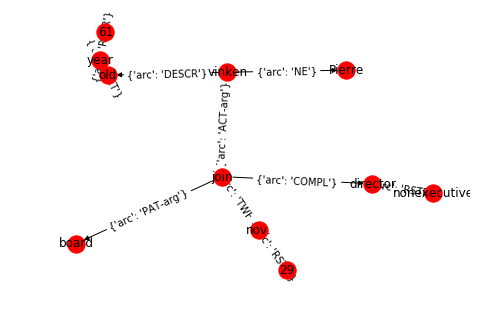

In [32]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(D)

nx.draw(D, pos)

nx.draw_networkx_labels(D, pos, labels=node_labels)
nx.draw_networkx_edge_labels(D, pos, labels=edge_labels.values)
plt.show()

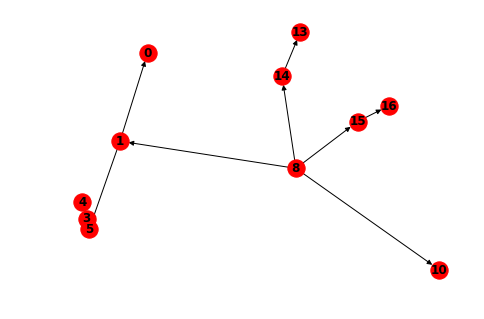

In [31]:
import matplotlib.pyplot as plt
nx.draw(D, with_labels=True, font_weight='bold')
plt.show()

## What is the number of unique nodes 
Same word label, same part of speech; (same frame? ~'valence'~)

# Graph kernels
Train with graphs as input, give single output classifying the TYPE of graph. 

We're not dealing with TYPES of graphs... yet. First cluster, then assign types, then apply a graph kernel + SVM to see if we can reliably classify kernels according to our CLUSTERED types???